In [3]:
import matplotlib.pyplot as plt

In [ ]:
from helper import load_dataset

df = load_dataset("data/concat_data_2015_2024_filled.CSV", resample_rule="W")
df.head()


,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C),TEMPERATURA
DATA,,,,,,,
2015-01-04,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-11,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-18,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-01-25,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818
2015-02-01,0.709091,831.636364,831.954545,831.454545,18.0,16.463636,17.231818


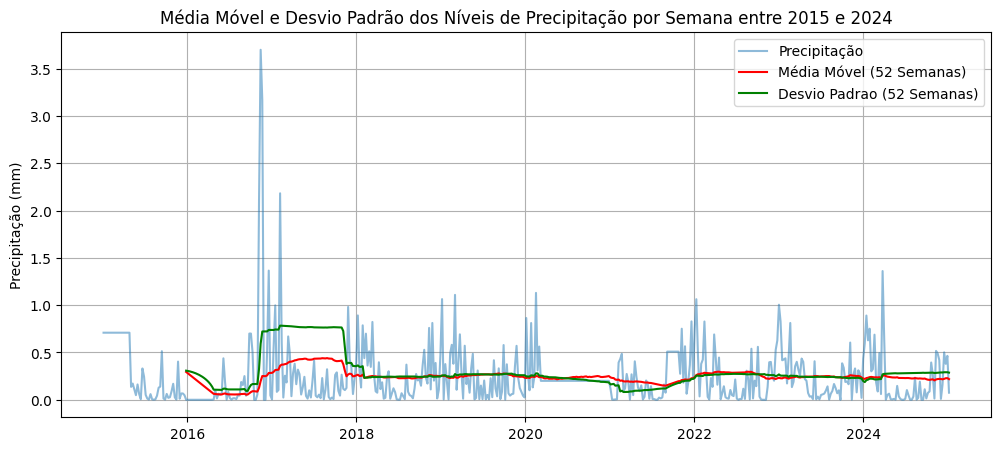

adf_statistic:  -4.892141712591772
p_value:  3.612369036567375e-05
critical_values:  {'1%': -3.4432372923913124, '5%': -2.86722383510113, '10%': -2.5697972702806613}


In [10]:
# check for stationarity

from statsmodels.tsa.stattools import adfuller

# Select the precipitation column
precip_col = "PRECIPITAÇÃO TOTAL HORÁRIO (mm)"
precip_data = df[precip_col]

# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 5))
plt.plot(precip_data, label="Precipitação", alpha=0.5)
plt.plot(precip_data.rolling(window=52).mean(), label="Média Móvel (52 Semanas)", color="red")
plt.plot(precip_data.rolling(window=52).std(), label="Desvio Padrao (52 Semanas)", color="green")
plt.ylabel("Precipitação (mm)")
plt.grid()
plt.legend()
plt.title("Média Móvel e Desvio Padrão dos Níveis de Precipitação por Semana entre 2015 e 2024")
plt.show()

# Perform ADF test
adf_result = adfuller(precip_data)

# Extract test results
adf_statistic, p_value, _, _, critical_values, _ = adf_result

print("adf_statistic: ", adf_statistic)
print("p_value: ", p_value)
print("critical_values: ", critical_values)

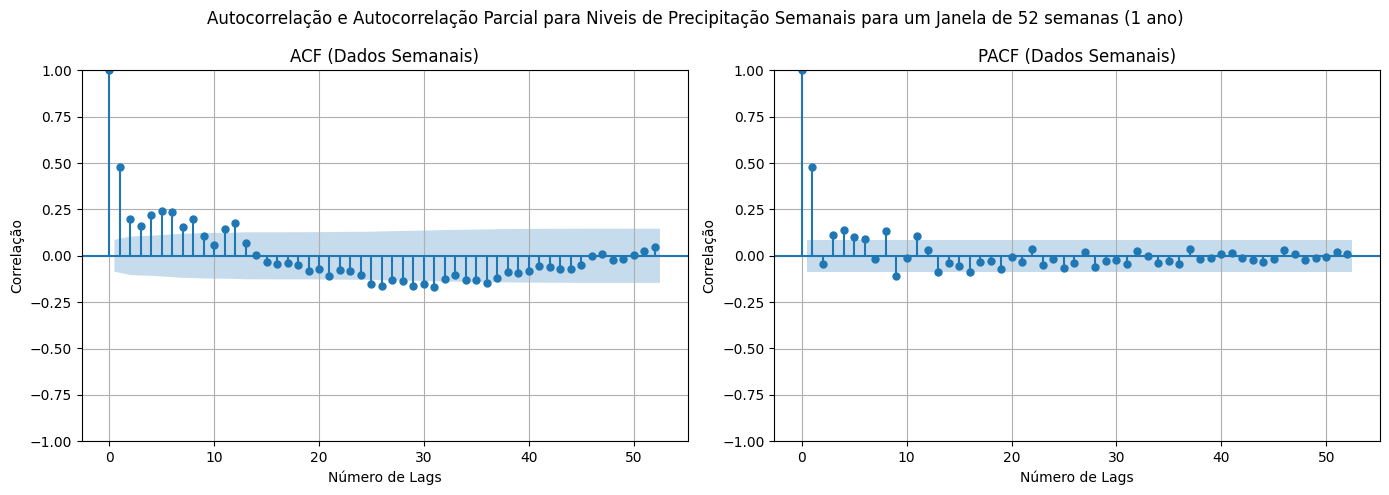

In [22]:
# Plot ACF and PACF for the weekly data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

num_of_lags = 52 # Up to 1 years of lags

plot_acf(precip_data, lags=num_of_lags, ax=axes[0])
axes[0].set_title("ACF (Dados Semanais)")
axes[0].set_xlabel("Número de Lags")
axes[0].set_ylabel("Correlação")
axes[0].grid()

plot_pacf(precip_data, lags=num_of_lags, ax=axes[1])
axes[1].set_title("PACF (Dados Semanais)")
axes[1].set_xlabel("Número de Lags")
axes[1].set_ylabel("Correlação")
axes[1].grid()

fig.suptitle("Autocorrelação e Autocorrelação Parcial para Niveis de Precipitação Semanais para um Janela de 52 semanas (1 ano)")
fig.tight_layout()

plt.show()

In [23]:
# Split data in train and test

features = ["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)", "TEMPERATURA"]

endg_train = df["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"][:"2022-12-31"]
endg_test = df["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"]["2023-01-01":]

exog_train = df[features][:"2022-12-31"]
exog_test = df[features]["2023-01-01":]

In [35]:
import pmdarima as pm

model = pm.auto_arima(
    endg_train,
    X=exog_train,
    seasonal=True,
    m=52,                # Seasonal period
    stepwise=True,      # Use stepwise search to speed up
    suppress_warnings=True,
    error_action="ignore"
)

order = model.order
seasonal_order = model.seasonal_order

print(f"Parâmetros ARIMA: {order}, Parâmetros Sasionais: {seasonal_order}")

/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/sklearn/utils/d

Parâmetros ARIMA: (3, 1, 2), Parâmetros Sasionais: (0, 0, 0, 52)


In [36]:
from statsmodels.tsa.statespace import sarimax

# Define new SARIMA model for weekly data
model = sarimax.SARIMAX(
    endog=endg_train,
    exog=exog_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
result = model.fit(disp=False)

# Display the model summary
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PRECIPITAÇÃO TOTAL HORÁRIO (mm)   No. Observations:                  417
Model:                            SARIMAX(3, 1, 2)   Log Likelihood                 -85.750
Date:                             Tue, 04 Feb 2025   AIC                            187.499
Time:                                     21:21:44   BIC                            219.687
Sample:                                 01-04-2015   HQIC                           200.230
                                      - 12-25-2022                                         
Covariance Type:                               opg                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)    -0.0458      0.010     -4.393      0.000      -0.066      -0.025
TEMPERATURA                                             -0.0170      0.010     -1.770      0.077      -0.036       0.002
ar.L1                                                   -0.4579      0.100     -4.592      0.000      -0.653      -0.262
ar.L2                                                    0.1319      0.064      2.071      0.038       0.007       0.257
ar.L3                                                   -0.2599      0.033     -7.928      0.000      -0.324      -0.196
ma.L1                                                    0.0118      0.098      0.121      0.904      -0.180       0.203
ma.L2                                                   -0.7022      0.091     -7.699      0.000      -0.881      -0.523
sigma2                                                   0.0884      0.003     32.600      0.000       0.083       0.094
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6418.52
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             2.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

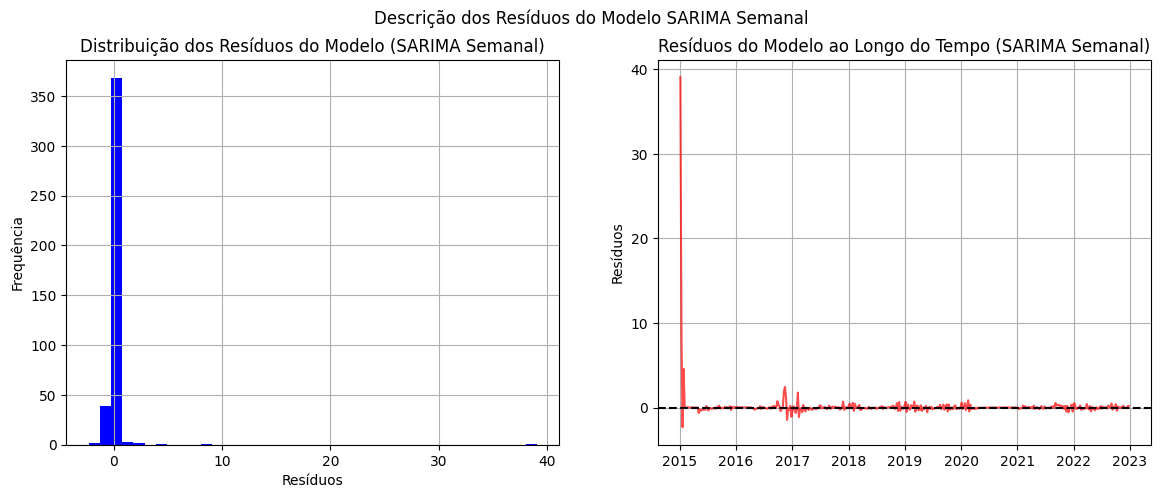

Média dos Resíduos 0.11220900915803733
Desvio Padrão dos Resíduos 1.9980092300099899


In [38]:
import numpy as np

residuals = result.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=40, color='blue')
axes[0].set_title("Distribuição dos Resíduos do Modelo (SARIMA Semanal)")
axes[0].set_xlabel("Resíduos")
axes[0].set_ylabel("Frequência")
axes[0].grid()

# Residuals over time
axes[1].plot(residuals, color='red', alpha=0.7)
axes[1].axhline(0, linestyle="--", color="black")
axes[1].set_title("Resíduos do Modelo ao Longo do Tempo (SARIMA Semanal)")
axes[1].set_ylabel("Resíduos")
axes[1].grid()

fig.suptitle("Descrição dos Resíduos do Modelo SARIMA Semanal")

plt.show()

# Check residuals mean and standard deviation
residuals_mean_monthly = np.mean(residuals)
residuals_std_monthly = np.std(residuals)

print("Média dos Resíduos", residuals_mean_monthly) 
print("Desvio Padrão dos Resíduos", residuals_std_monthly) 


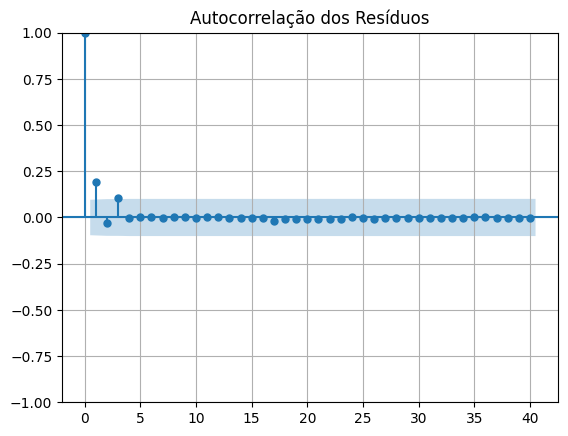

      lb_stat  lb_pvalue
10  20.523730   0.024671
20  20.790810   0.409536
30  20.943973   0.889632


In [40]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# ACF Plot (Autocorrelation of Residuals)
plot_acf(residuals, lags=40)
plt.title("Autocorrelação dos Resíduos")
plt.grid()
plt.show()

# Ljung-Box Test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print(lb_test)

In [42]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(residuals)
print(f"ARCH Test P-Value: {arch_test[1]:.9f}")

ARCH Test P-Value: 0.000000000


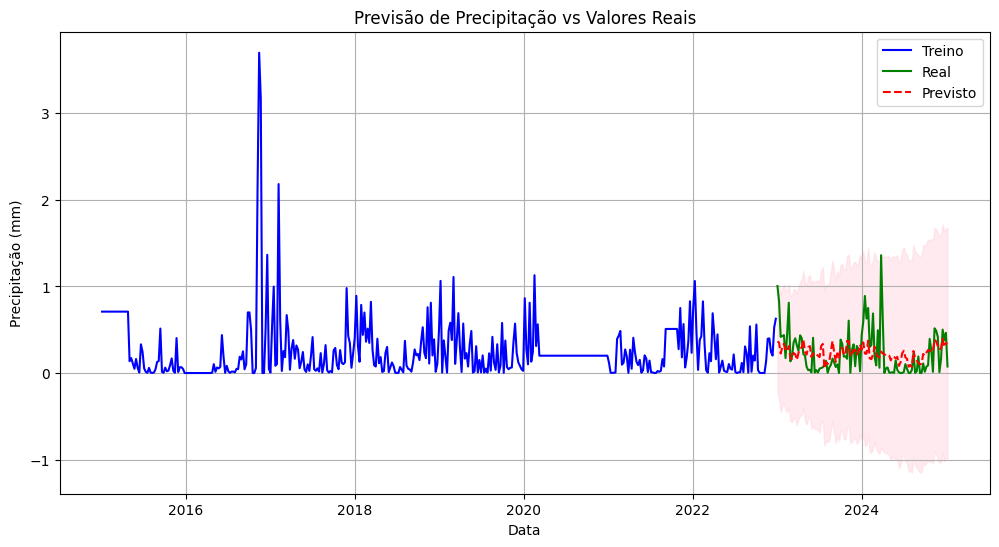

MAE: 0.17
RMSE: 0.23
R²: 0.19


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazer previsões para o período de teste
forecast = result.get_forecast(steps=len(endg_test), exog=exog_test)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calcular métricas de avaliação
mae = mean_absolute_error(endg_test, forecast_values)
rmse = np.sqrt(mean_squared_error(endg_test, forecast_values))
r2 = r2_score(endg_test, forecast_values)

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(endg_train.index, endg_train, label='Treino', color='blue')
plt.plot(endg_test.index, endg_test, label='Real', color='green')
plt.plot(endg_test.index, forecast_values, label='Previsto', color='red', linestyle='--')
plt.fill_between(endg_test.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Previsão de Precipitação vs Valores Reais')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir métricas
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')